# SI 330: Homework 6: Investigating Sports Teams Drafts Using Pandas


## Due: Friday, February 23, 2018,  11:59:00pm

### Submission instructions</font>
After completing this homework, you will turn in two files via Canvas ->  Assignments -> HW 5:
Your Notebook, named si330-hw5-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-hw5-YOUR_UNIQUE_NAME.html.

### Name:  Dingan Chen
### Uniqname: dinganc
### People you worked with: [if you didn't work with anyone else write "I worked by myself" here].


## Learning Objectives
After completing this Homework, you should know how to:

* To gain experience scraping data from web pages
* To practice loading CSV files via pandas
* To learn how to combine datasets
* To create a simple visualization using a scatterplot matrix
 

## Goals
To use data from two sources (Wikipedia and basketball-reference.com) to answer a series of questions and investigate the data.

## Background

In a draft, National Basketball Association (NBA) teams took turns selecting amateur U.S. college basketball players and other eligible players, including international players. (https://en.wikipedia.org/wiki/2011_NBA_draft) 

A draft is a process used in some countries and sports to allocate certain players to teams. In a draft, teams take turns selecting from a pool of eligible players. When a team selects a player, the team receives exclusive rights to sign that player to a contract, and no other team in the league may sign the player.
The best-known type of draft is the entry draft, which is used to allocate players who have recently become eligible to play in a league. Depending on the sport, the players may come from college, high school or junior teams or teams in other countries.
An entry draft is intended to prevent expensive bidding wars for young talent and to ensure that no one team can sign contracts with all of the best young players and make the league uncompetitive. To encourage parity, teams that do poorly in the previous season usually get to choose first in the postseason draft, sometimes with a "lottery" factor to discourage teams from deliberately losing.
(https://en.wikipedia.org/wiki/Draft_(sports))

## Data Sources 

We will be using two sources of data for this assignment:  Basketball Reference (www.basketball-reference.com) and Wikipedia.  We have provided data from Basketball Reference in the form of CSV files.  You will need to scrape data from Wikipedia.  For this assignment you will need to use 10 years of data (from 2008 to 2017).  That means you will need to use the 10 CSV files we give you as well as scraping from Wikipedia:

1. https://en.wikipedia.org/wiki/2008_NBA_draft
1. https://en.wikipedia.org/wiki/2009_NBA_draft
1. https://en.wikipedia.org/wiki/2010_NBA_draft
1. https://en.wikipedia.org/wiki/2011_NBA_draft
1. https://en.wikipedia.org/wiki/2012_NBA_draft
1. https://en.wikipedia.org/wiki/2013_NBA_draft
1. https://en.wikipedia.org/wiki/2014_NBA_draft
1. https://en.wikipedia.org/wiki/2015_NBA_draft
1. https://en.wikipedia.org/wiki/2016_NBA_draft
1. https://en.wikipedia.org/wiki/2017_NBA_draft

You will need to use data from the two sources to answer the following questions.  In some cases you will need to join the data from the two sources; in other cases you will be able to answer the questions by using the data from only one source.

First, let's load the libraries that we'll need:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

## Step 1: Read the data

You'll need to load the data from both Wikipedia and from the CSV files that we provided from basketball-reference.com.  Let's start with the CSV files.




### Step 1a: Read the CSV files
Each of the CSV files has the same format.  There are two header lines and 60 data lines.  The first 30 data lines 
represent players from the first round of drafts and the last 30 data lines represent players from the 
second round of drafts.

Note that you will need to clean up the Player column (keeping only the actual name).

#### <font color="magenta">Read the data from each file, adding two columns: </font> 
1. one for the year and (HINT: it's in the filename)
1. one for the draft round (1 or 2). (HINT: np.where() might help)


In [2]:
df_csv=pd.read_csv('NBA_2008.csv')
df_csv['Year']=2008
for i in range(9,18):
    fname='NBA_'+str(2000+i)+'.csv'
    dy=pd.read_csv(fname)
    dy['Year']=2000+i
    df_csv=pd.concat([df_csv,dy]).reset_index(drop=True)
df_csv['Player'] = df_csv['Player'].str.extract(r'(.+)\\',expand=False)
df_csv['Round']=np.where(df_csv['Pk'] < 31, 1, 2)
print(df_csv.head())

   Rk  Pk   Tm             Player                               College   Yrs  \
0   1   1  CHI       Derrick Rose                 University of Memphis   9.0   
1   2   2  MIA    Michael Beasley               Kansas State University  10.0   
2   3   3  MIN          O.J. Mayo     University of Southern California   8.0   
3   4   4  SEA  Russell Westbrook  University of California Los Angeles  10.0   
4   5   5  MEM         Kevin Love  University of California Los Angeles  10.0   

       G       MP      PTS     TRB  ...    MP.1  PTS.1  TRB.1  AST.1    WS  \
0  486.0  16600.0   9312.0  1764.0  ...    34.2   19.2    3.6    5.8  34.3   
1  561.0  13052.0   7082.0  2669.0  ...    23.3   12.6    4.8    1.3  14.6   
2  547.0  16919.0   7574.0  1706.0  ...    30.9   13.8    3.1    2.9  21.8   
3  725.0  24848.0  16605.0  4683.0  ...    34.3   22.9    6.5    8.1  87.5   
4  624.0  20116.0  11450.0  7061.0  ...    32.2   18.3   11.3    2.3  75.8   

   WS/48  BPM  VORP  Year  Round  
0  0.099 

### Step 1b: Read the Wikipedia tables
Create a dataframe that stores the data for all the years. You will need to start with each url, store the table as a dataframe and concatenate the dataframes.  We've provided most of the code for you.  
#### <font color="magenta">All you need to do is fill in the correct values for ```headerLine``` and ```tableNumber```, which are used in the read_html line below.</font>

In [3]:
headerLine = 0 # Replace -9 with the correct value
tableNumber = 3 # Replace -9 with the correct value

In [4]:
df_wiki = pd.DataFrame()
urls = ['https://en.wikipedia.org/wiki/2017_NBA_draft',
        'https://en.wikipedia.org/wiki/2016_NBA_draft', 
        'https://en.wikipedia.org/wiki/2015_NBA_draft', 
        'https://en.wikipedia.org/wiki/2014_NBA_draft', 
        'https://en.wikipedia.org/wiki/2013_NBA_draft', 
        'https://en.wikipedia.org/wiki/2012_NBA_draft', 
        'https://en.wikipedia.org/wiki/2011_NBA_draft', 
        'https://en.wikipedia.org/wiki/2010_NBA_draft', 
        'https://en.wikipedia.org/wiki/2009_NBA_draft', 
        'https://en.wikipedia.org/wiki/2008_NBA_draft']

for url in urls:
    dx = pd.read_html(url, header=headerLine)[tableNumber]
    df_wiki = pd.concat([df_wiki, dx]).reset_index(drop=True)

print(df_wiki.head())

  Nationality[n 1]  Pick                         Player   Pos. Position  Rnd.  \
0    United States     1  Fultz, MarkelleMarkelle Fultz  PG/SG      NaN   1.0   
1    United States     2          Ball, LonzoLonzo Ball     PG      NaN   1.0   
2    United States     3      Tatum, JaysonJayson Tatum     SF      NaN   1.0   
3    United States     4      Jackson, JoshJosh Jackson     SF      NaN   1.0   
4    United States     5      Fox, De'AaronDe'Aaron Fox     PG      NaN   1.0   

   Round School / club team School/club team  \
0    NaN   Washington (Fr.)              NaN   
1    NaN         UCLA (Fr.)              NaN   
2    NaN         Duke (Fr.)              NaN   
3    NaN       Kansas (Fr.)              NaN   
4    NaN     Kentucky (Fr.)              NaN   

                                                Team  
0  Philadelphia 76ers (from Brooklyn via Boston)[...  
1                                 Los Angeles Lakers  
2  Boston Celtics (from Sacramento via Philadelph...  
3   

### 1.1 Cleaning the Wikipedia data

You will see that some of the columns are repeated with minor modifications (e.g. "School / club team" and "School/club team" -- notice the different spacing) and there are values in only one or the other column. That is because the wikipedia column headers are not consistent.

#### <font color="magenta">Combine all the columns that have different names but contain the same variables.  Drop the extra columns when you're done combining them.</font>

In [5]:
alias={'Position':'Pos.','Round':'Rnd.','School/club team':'School / club team'}
for i in alias.items():
    df_wiki[i[0]].fillna(df_wiki[i[1]],inplace=True)
    if i[0]=='Round':df_wiki[i[0]] = pd.to_numeric(df_wiki[i[0]], downcast='integer')

df_wiki = df_wiki.drop(columns = ['Pos.', 'Rnd.', 'School / club team'])

print(df_wiki.head())

  Nationality[n 1]  Pick                         Player Position  Round  \
0    United States     1  Fultz, MarkelleMarkelle Fultz    PG/SG      1   
1    United States     2          Ball, LonzoLonzo Ball       PG      1   
2    United States     3      Tatum, JaysonJayson Tatum       SF      1   
3    United States     4      Jackson, JoshJosh Jackson       SF      1   
4    United States     5      Fox, De'AaronDe'Aaron Fox       PG      1   

   School/club team                                               Team  
0  Washington (Fr.)  Philadelphia 76ers (from Brooklyn via Boston)[...  
1        UCLA (Fr.)                                 Los Angeles Lakers  
2        Duke (Fr.)  Boston Celtics (from Sacramento via Philadelph...  
3      Kansas (Fr.)                                       Phoenix Suns  
4    Kentucky (Fr.)            Sacramento Kings (from Philadelphia)[C]  


#### <font color="magenta">Rename the columns so that they are easier to read.</font>
Your resulting columns should be: Nationality, Pick, Player, Position, Round, From, and Team.  The "From" column is the "School/club team" columns in the original dataset; the other column names should be self-explanatory.

In [6]:
df_wiki.columns = ['Nationality', 'Pick', 'Player', 'Position', 'Round', 'School/club team', 'Team']

You'll notice that the player names look weird (they're doubled).  
#### <font color="magenta">Fix that.

In [7]:
df_wiki['Player']=[entry[:int((len(entry) + 1)/2)] for entry in df_wiki['Player']]
print(df_wiki['Player'].head())

0    Fultz, Markelle
1        Ball, Lonzo
2      Tatum, Jayson
3      Jackson, Josh
4      Fox, De'Aaron
Name: Player, dtype: object


## Step 2. Players’ nationalities

Answer each of the following questions.  You will need to decide how to handle cases where players identify multiple nationalities.

* <font color="magenta">What proportion of **Round 1** draft picks identify their nationality as something other than U.S.A?
* <font color="magenta">Excluding nationalities of “U.S.A”, what are the 10 most common nationalities of **Round 1** draft picks?



In [8]:
import re
def clean(strin):
    strin=re.sub(r'\w\[›\]','',strin)
    strin=re.sub(r'\[.*\]','',strin)
    strin=re.sub(r'\\xa0','',strin)
    return strin
df_wiki['Nationality']=df_wiki['Nationality'].apply(clean)
df_wiki_r1=df_wiki[df_wiki['Round']==1]
portion=round(100*(df_wiki_r1[~df_wiki_r1['Nationality'].str.contains('United States')].shape[0]/df_wiki_r1['Nationality'].shape[0]),2)
print(portion,"% of Round 1 draft picks identify their nationality as something other than U.S.A")
df_wiki_r1_exus=df_wiki_r1[~df_wiki_r1['Nationality'].str.contains('United States')]
print('\nTop 10 most common nationalities are\n',df_wiki_r1_exus['Nationality'].value_counts()[:10])

24.33 % of Round 1 draft picks identify their nationality as something other than U.S.A

Top 10 most common nationalities are
 Canada       10
France       10
Spain         4
Croatia       4
Serbia        3
Australia     3
DR Congo      3
Brazil        3
Lithuania     3
Latvia        2
Name: Nationality, dtype: int64


## Step 3: Which schools or teams are the players from?

You can get the required data from either of the data sources. Choose the most complete source.  Answer the following question.
* <font color="magenta">What are the top 10 Schools/Clubs/Colleges that Round 1 players are picked from?  



In [9]:
def clean2(strin):
    strin=re.sub(r'\w\[›\]','',strin)
    strin=re.sub(r'\[.*\]','',strin)
    strin=re.sub(r'\(.*\)','',strin)
    strin=re.sub(r'\\xa0','',strin)
    return strin
df_wiki['School/club team']=df_wiki['School/club team'].apply(clean2)
df_wiki_r1=df_wiki[df_wiki['Round']==1]
print('\nTop 10 most common schools are\n',df_wiki_r1['School/club team'].value_counts()[:10])


Top 10 most common schools are
 Kentucky           24
Duke               15
North Carolina     12
Kansas             12
UCLA               11
Syracuse           10
Arizona             8
Texas               8
Washington          7
Indiana             6
Name: School/club team, dtype: int64


## Step 4: Adding a new column

#### <font color="magenta">Create a new column called “outcome” and assign values based on information from the Wikipedia pages as follows:
* If a player was selected for (i) at least one All-Star Game, or (ii) at least one All-NBA Team, or (iii) both at least one All-Star Game and at least one All-NBA team, assign the value “high” to the “outcome” column

* If a player never played in the NBA regular season or playoffs, assign “low” to the “outcome” column

* Otherwise, assign “medium” to the “outcome” column


In [25]:
urls = ['https://en.wikipedia.org/wiki/2017_NBA_draft',
        'https://en.wikipedia.org/wiki/2016_NBA_draft', 
        'https://en.wikipedia.org/wiki/2015_NBA_draft', 
        'https://en.wikipedia.org/wiki/2014_NBA_draft', 
        'https://en.wikipedia.org/wiki/2013_NBA_draft', 
        'https://en.wikipedia.org/wiki/2012_NBA_draft', 
        'https://en.wikipedia.org/wiki/2011_NBA_draft', 
        'https://en.wikipedia.org/wiki/2010_NBA_draft', 
        'https://en.wikipedia.org/wiki/2009_NBA_draft', 
        'https://en.wikipedia.org/wiki/2008_NBA_draft']
res=[]
for url in urls:
    htmlpage=requests.get(url).content
    soup=BeautifulSoup(htmlpage,'lxml')
    tables=soup.select('table.wikitable')
    draft_picks = tables[2]
    data_rows= draft_picks.find_all('tr')[1:]
    for data in data_rows:
        if data.find('td',attrs={'bgcolor':True}):
            color=data.find('td',attrs={'bgcolor':True})['bgcolor']
            if color=='#FBCEB1' or color=='FFCC00' or color=='#CCFFCC':
                res.append('high')
            elif color=='#C0C0C0':
                res.append('low')
            else:
                res.append('medium')
        else:
            res.append('medium')
df_wiki['outcome']=res

In [31]:
print(df_wiki.tail())

       Nationality  Pick             Player Position  Round  \
595         Russia    56        Kaun, Sasha        C      2   
596  United States    57        Gist, James       PF      2   
597  United States    58      Crawford, Joe       SG      2   
598  United States    59  Washington, Deron       SF      2   
599         Turkey    60       Erden, Semih        C      2   

      School/club team                                               Team  \
595            Kansas   Seattle SuperSonicsa[›] (from New Orleans via ...   
596          Maryland                                   San Antonio Spurs   
597          Kentucky                                  Los Angeles Lakers   
598     Virginia Tech                                     Detroit Pistons   
599  Fenerbahçe Ülker                                      Boston Celtics   

    outcome  
595  medium  
596     low  
597  medium  
598     low  
599  medium  


## Step 5: Save and upload your data
#### <font color="magenta">Write your resulting dataframe to a **tab-separated** file
called si330w18-YOURUNIQNAME-lab6data.txt and **upload your file to the AWS S3 bucket you created** earlier in the course. Record the URL of the **tab-separated** file in the following Markdown block.

In [32]:
df_wiki.to_csv('si330w18-dinganc-lab6data.txt',sep='\t')

https://s3.amazonaws.com/bucket-for-si330-hmwk6-dinganc/si330w18-dinganc-lab6data.txt

## Step 6: Create a visualization

Using the lab as a guide, and remembering that the iris data pairplot example (https://seaborn.pydata.org/generated/seaborn.pairplot.html) create a pairplot of 'MP/Game', 'PTS/Game', 'TRB/Game', 'AST/Game', and “VORP”   (https://www.basketball-reference.com/about/bpm.html)  setting the color (hue) according to the value in the “Outcome” column. 

**NOTE:** You will need to join your two dataframes (one from basketball-reference.com and one from Wikipedia) on the 'Player' column.  Assuming you have two dataframes called 'df_bbref' and 'df_wiki', you could use something like:

```
df_wiki.set_index('Player')
df_bbref.set_index('Player')
df_joined = df_wiki.join(df_bbref,rsuffix='_r') 
``` 

to join the two DataFrames.

In [33]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

C:\Users\X\AppData\Local\conda\conda\envs\si330\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\X\AppData\Local\conda\conda\envs\si330\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


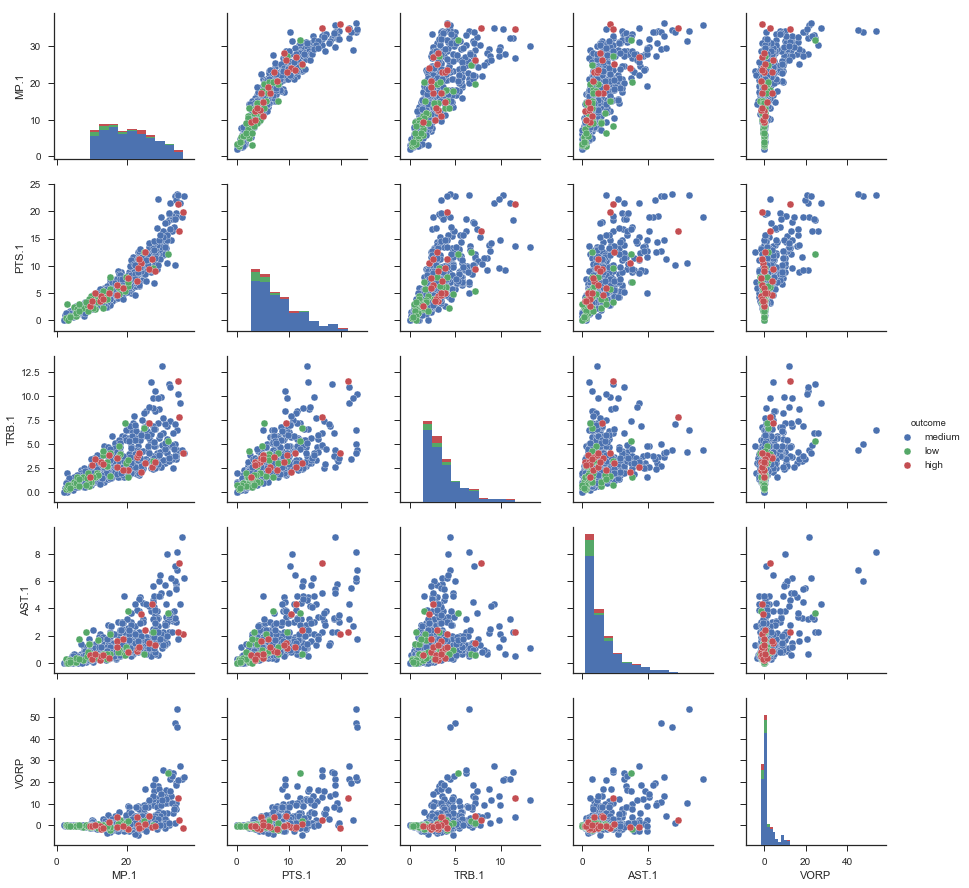

In [42]:
df_wiki.set_index('Player')
df_csv.set_index('Player')
df_joined = df_wiki.join(df_csv,rsuffix='_r')
sns.pairplot(df_joined[['Player','MP.1','PTS.1','TRB.1','AST.1','VORP','outcome']], dropna=True,hue='outcome')

## Above and Beyond

Indicate here why you believe that your work should be considered "above and beyond".

For the nationality, I cleaned and removed special characters such as [n 4], [>], and UNICODE identifier. Therfore, players with nationality = "Turkey[n 4]" is counted as player nationality = "Turkey"

For the school info, I also cleaned the data, removed all the stuff in "()" and "[]" because I think the grade/year of the player is irrelevant to the question, since we only care about the school, not the grade. Not cleaning the data might split the counts between two grade levels within the same school